In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_mpv = 5.99e-10

threshold = 1.25e-5
bins = np.linspace(-2.5e-10, 1.5e-9, 100)

In [3]:
df = pl.read_csv("data/lifetime.csv")["electron_intS", "electron_T", "muon_T"]
df

electron_intS,electron_T,muon_T
f64,f64,f64
3.8328e-10,1.5256e-9,-0.000002
5.2800e-10,1.0437e-9,-0.000001
4.4784e-10,6.4600e-10,-5.5615e-7
4.1784e-10,7.5818e-10,-6.5119e-7
2.9280e-11,-6.4385e-10,-7.2548e-7
…,…,…
5.1864e-10,9.4775e-10,-1.1741e-7
3.2640e-11,-2.7903e-9,-3.0206e-7
3.2472e-10,-8.4566e-11,-3.7568e-7


In [4]:
ST = pl.DataFrame(
    {
        "S": df["electron_intS"],
        "dT": df["electron_T"] - df["muon_T"],
    }
)
ST

S,dT
f64,f64
3.8328e-10,0.000002
5.2800e-10,0.000001
4.4784e-10,5.5679e-7
4.1784e-10,6.5194e-7
2.9280e-11,7.2484e-7
…,…
5.1864e-10,1.1835e-7
3.2640e-11,2.9927e-7
3.2472e-10,3.7560e-7


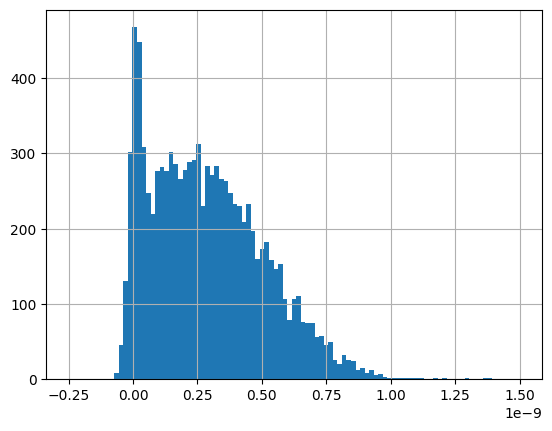

In [5]:
fig, ax = plt.subplots()
ax.hist(ST["S"], bins=bins)
ax.grid()

In [6]:
fST = ST.filter(ST["dT"] < threshold)
fST

S,dT
f64,f64
3.8328e-10,0.000002
5.2800e-10,0.000001
4.4784e-10,5.5679e-7
4.1784e-10,6.5194e-7
2.9280e-11,7.2484e-7
…,…
5.1864e-10,1.1835e-7
3.2640e-11,2.9927e-7
3.2472e-10,3.7560e-7


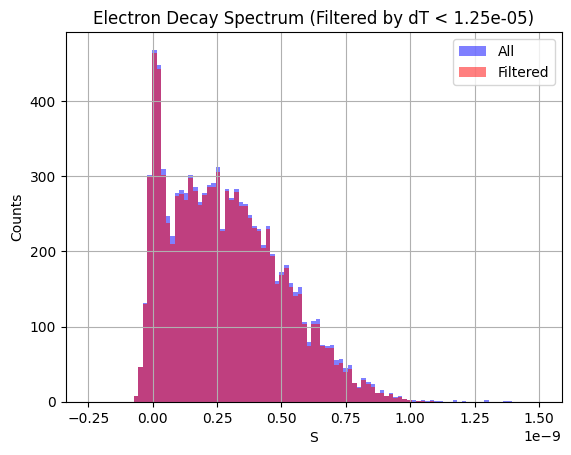

In [7]:
# width幅を一定に
fig, ax = plt.subplots()
ax.hist(ST["S"], bins=bins, color="blue", alpha=0.5, label="All")
ax.hist(fST["S"], bins=bins, color="red", alpha=0.5, label=f"Filtered")
ax.set_title(f"Electron Decay Spectrum (Filtered by dT < {threshold})")
ax.set_xlabel("S")
ax.set_ylabel("Counts")
ax.grid()
ax.legend()
fig.savefig("images/electron_decay_spectrum_filtered_log.png")

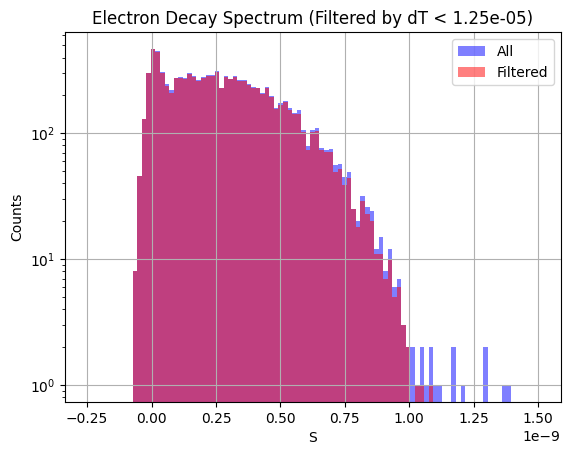

In [8]:
# width幅を一定に
fig, ax = plt.subplots()
ax.hist(ST["S"], bins=bins, color="blue", alpha=0.5, label="All")
ax.hist(fST["S"], bins=bins, color="red", alpha=0.5, label=f"Filtered")
ax.set_title(f"Electron Decay Spectrum (Filtered by dT < {threshold})")
ax.set_xlabel("S")
ax.set_ylabel("Counts")
ax.set_yscale("log")
ax.grid()
ax.legend()
fig.savefig("images/electron_decay_spectrum_filtered_log.png")

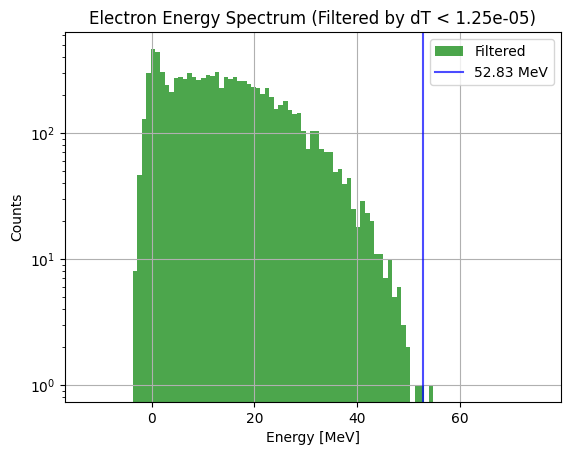

In [9]:
E = fST["S"] * 30 / x_mpv
Ebins = bins * 30 / x_mpv

fig, ax = plt.subplots()
ax.hist(E, bins=Ebins, color="green", alpha=0.7, label="Filtered")
ax.set_title(f"Electron Energy Spectrum (Filtered by dT < {threshold})")
ax.set_xlabel("Energy [MeV]")
ax.set_ylabel("Counts")
ax.set_yscale("log")
ax.axvline(x=52.83, ymin=0, ymax=1, label="52.83 MeV", color="blue", alpha=0.7)
ax.grid()
ax.legend()

fig.savefig("images/electron_energy_spectrum_filtered_log.png")

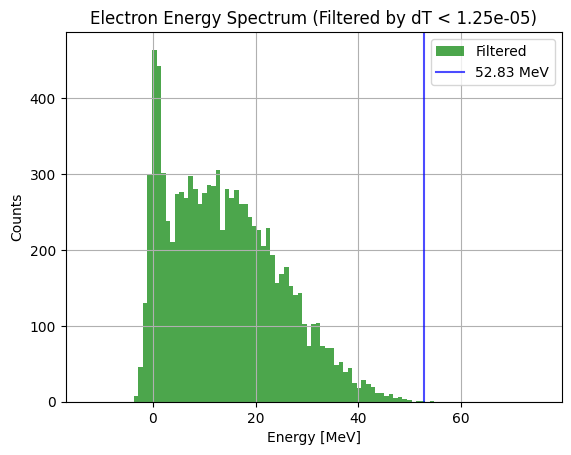

In [10]:
fig, ax = plt.subplots()
ax.hist(E, bins=Ebins, color="green", alpha=0.7, label="Filtered")
ax.set_title(f"Electron Energy Spectrum (Filtered by dT < {threshold})")
ax.set_xlabel("Energy [MeV]")
ax.set_ylabel("Counts")
ax.axvline(x=52.83, ymin=0, ymax=1, label="52.83 MeV", color="blue", alpha=0.7)
ax.grid()
ax.legend()

fig.savefig("images/electron_energy_spectrum_filtered.png")